/home/dhem/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dhem/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/dhem/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dhem/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[2.137178238320232, 4.222734501995916, 4.531623425551245, 5.988219284851341, 4.165153274638146, 4.582407264329903, 5.368801899850933, 4.8184964161676405, 4.64335572662478, 4.879105581210328, nan]
[147.89786653953607, 249.66670013687448, 241.22856889488764, 230.03823428969915, 357.85486642700863, 368.52171577677876, 352.2058881099617, 353.9472435201751, 360.6603618940756, 361.91821707628463, nan]


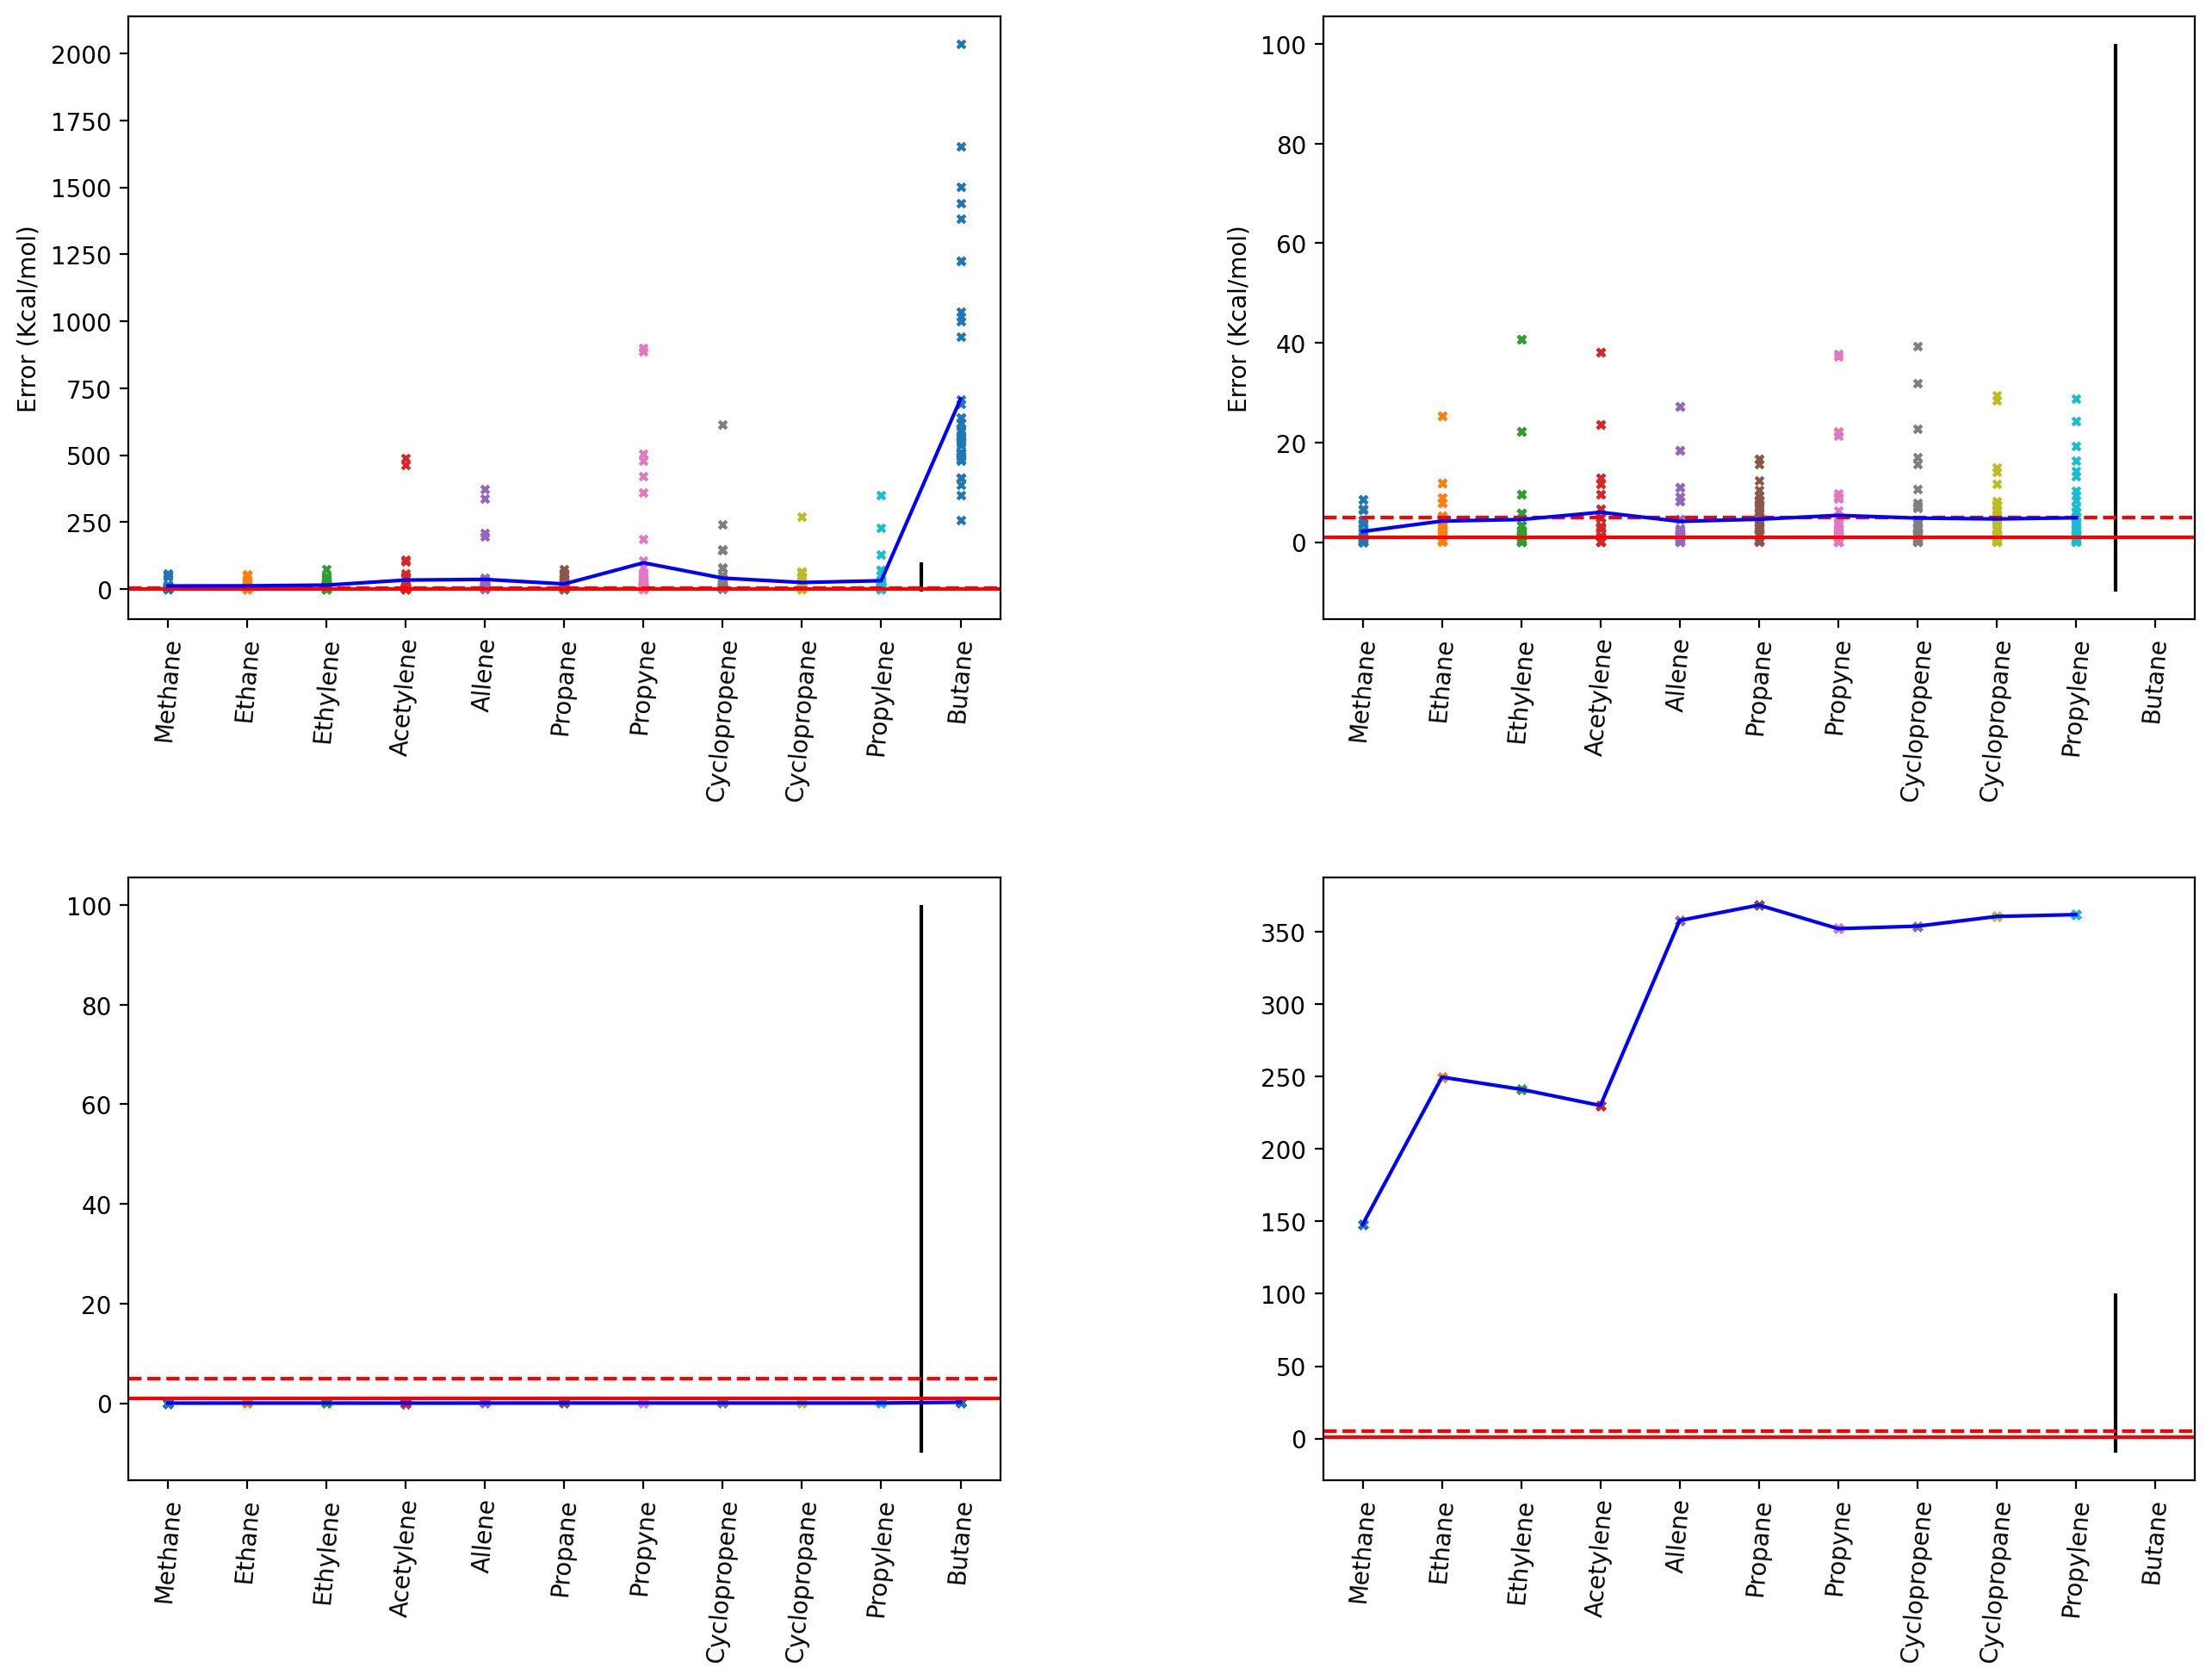

In [25]:
from pathlib import Path
import datetime

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

TRAIN_STR_DICT = [
    "Methane",
    "Ethane",
    "Ethylene",
    "Acetylene",
    "Allene",
    "Propane",
    "Propyne",
    "Cyclopropene",
    "Cyclopropane",
    "Propylene",
    # "Isobutane",
    # "Butane",
    # "Butadiene",
    # "Butyne",
    # "Bicyclobutane",
    # "Cyclobutane",
    # "Spiropentane",
    # "Cyclopropylmethyl",
    # "Neopentane",
    # "Cyclopentane",
    # "Benzene",
]
EVAL_STR_DICT = [
    "Butane",
    # "Pentane",
    # "Isopentane",
]

f, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.reshape(2, 2)

begin_y = 0.075
end_y = 0.925
int_y = 0.15
begin_x = 0.125
end_x = 0.925
int_x = 0.125
end_x += int_x
end_y += int_y

shapexy = np.shape(axes)
inter_x = np.linspace(begin_x, end_x, shapexy[1] + 1)
inter_y = np.linspace(begin_y, end_y, shapexy[0] + 1)

delta_x = inter_x[1] - inter_x[0] - int_x
delta_y = inter_y[1] - inter_y[0] - int_y

for i in range(shapexy[0]):
    for j in range(shapexy[1]):
        axes[i][j].set_position(
            [
                inter_x[j],
                inter_y[i],
                inter_x[j + 1] - inter_x[j] - int_x,
                inter_y[i + 1] - inter_y[i] - int_y,
            ]
        )

axes = axes[::-1, :]

list_of_path = list(
    Path("validate/").glob("validate-cc_dft_diff-2024-05-18-15-25-04-800")
)
load_path = max(list_of_path, key=lambda p: p.stat().st_ctime)

list_of_path_dft = list(Path("validate/").glob("dft"))
load_path_dft = max(list_of_path_dft, key=lambda p: p.stat().st_ctime)


for i_row in range(2):
    error_l = []
    data = pd.read_csv(load_path / "train.csv")
    for i, i_name in enumerate(TRAIN_STR_DICT):
        data_np = data.filter(regex=(f"{i_name}.*")).to_numpy()[i_row, :]
        data_np_sort = np.sort(np.abs(data_np))[1:]
        error_l.append(np.mean(data_np_sort))
        axes[i_row, 0].scatter(
            i + np.zeros_like(data_np_sort), data_np_sort, s=10, marker="x"
        )

    i += 1
    axes[i_row, 0].vlines(i - 0.5, -10, 100, "k")
    axes[i_row, 0].hlines(1, -0.5, 100 - 0.5, "r")
    axes[i_row, 0].hlines(5, -0.5, 100 - 0.5, "r", linestyle="--")

    data = pd.read_csv(load_path / "eval.csv")
    for j, j_name in enumerate(EVAL_STR_DICT):
        data_np = data.filter(regex=(f"{j_name}.*")).to_numpy()[i_row, :]
        data_np_sort = np.sort(np.abs(data_np))[1:]
        error_l.append(np.mean(data_np_sort))
        axes[i_row, 0].scatter(
            i + j + np.zeros_like(data_np_sort), data_np_sort, s=10, marker="x"
        )

    axes[i_row, 0].set_xticks(
        range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)),
        TRAIN_STR_DICT + EVAL_STR_DICT,
        rotation=85,
    )

    axes[i_row, 0].plot(range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)), error_l, "b")

    ## DFT
    error_l = []
    data = pd.read_csv(load_path_dft / "train_dft.csv")
    for i, i_name in enumerate(TRAIN_STR_DICT):
        data_eq = data.filter(regex=(f"{i_name}_0_1_0.0000")).to_numpy()[0]
        data_np = (
            data.filter(regex=(f"{i_name}.*")).to_numpy()[i_row, :] - data_eq
        )
        data_np_sort = np.sort(np.abs(data_np))[1:]
        error_l.append(np.mean(data_np_sort))
        axes[i_row, 1].scatter(
            i + np.zeros_like(data_np_sort), data_np_sort, s=10, marker="x"
        )

    i += 1
    axes[i_row, 1].vlines(i - 0.5, -10, 100, "k")
    axes[i_row, 1].hlines(1, -0.5, 100 - 0.5, "r")
    axes[i_row, 1].hlines(5, -0.5, 100 - 0.5, "r", linestyle="--")

    data = pd.read_csv(load_path_dft / "eval_dft.csv")
    for j, j_name in enumerate(EVAL_STR_DICT):
        data_eq = data.filter(regex=(f"{j_name}_0_1_0.0000")).to_numpy()[0]
        data_np = (
            data.filter(regex=(f"{j_name}.*")).to_numpy()[i_row, :] - data_eq
        )
        data_np_sort = np.sort(np.abs(data_np))[1:]
        error_l.append(np.mean(data_np_sort))
        axes[i_row, 1].scatter(
            i + j + np.zeros_like(data_np_sort), data_np_sort, s=10, marker="x"
        )

    axes[i_row, 1].set_xticks(
        range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)),
        TRAIN_STR_DICT + EVAL_STR_DICT,
        rotation=85,
    )
    print(error_l)
    axes[i_row, 1].plot(range(len(TRAIN_STR_DICT) + len(EVAL_STR_DICT)), error_l, "b")

    # axes[i_row, 0].set_ylim(-5, 50)
    axes[i_row, 0].set_xlim(-0.5, len(TRAIN_STR_DICT) + len(EVAL_STR_DICT) - 0.5)
    # axes[i_row, 1].set_ylim(-5, 50)
    axes[i_row, 1].set_xlim(-0.5, len(TRAIN_STR_DICT) + len(EVAL_STR_DICT) - 0.5)
axes[0, 0].set_ylabel("Error (Kcal/mol)")
axes[0, 1].set_ylabel("Error (Kcal/mol)")
plt.savefig(
    f"./manu/figures/energy-cc_dft_diff-{datetime.datetime.today():%Y-%m-%d-%H-%M-%S}.pdf",
    bbox_inches="tight",
)

In [5]:
import numpy as np
# print(np.linspace(-0.49, 0.49, 8))
print(np.linspace(-0.5, 0.5, 51))
print(np.linspace(-0.5, -0.26, 13))
print(np.linspace(-0.24, -0.02, 12))
print(np.linspace(0.0, 0.24, 13))
print(np.linspace(0.26, 0.5, 13))

# -0.25*2 +0.08333333

[-0.5  -0.48 -0.46 -0.44 -0.42 -0.4  -0.38 -0.36 -0.34 -0.32 -0.3  -0.28
 -0.26 -0.24 -0.22 -0.2  -0.18 -0.16 -0.14 -0.12 -0.1  -0.08 -0.06 -0.04
 -0.02  0.    0.02  0.04  0.06  0.08  0.1   0.12  0.14  0.16  0.18  0.2
  0.22  0.24  0.26  0.28  0.3   0.32  0.34  0.36  0.38  0.4   0.42  0.44
  0.46  0.48  0.5 ]
[-0.5  -0.48 -0.46 -0.44 -0.42 -0.4  -0.38 -0.36 -0.34 -0.32 -0.3  -0.28
 -0.26]
[-0.24 -0.22 -0.2  -0.18 -0.16 -0.14 -0.12 -0.1  -0.08 -0.06 -0.04 -0.02]
[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24]
[0.26 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5 ]


In [11]:
(np.abs(np.linspace(-0.25, 0.25, 4) - 0) < 1e-4).any()

False